<h1 align = "center">EE 325 Digital Signal Processing</h1>
<h2 align = "center">Laboratory Assignment 2</h2>
<h3 align = "center"> E/19/445 </h3>


In [25]:
import numpy as np
import math
import sympy as sp
from scipy.signal import butter, freqs, TransferFunction, group_delay, impulse, cheby1, cheby2, ellip, lfilter
import matplotlib.pyplot as plt

In [2]:
x, y, a, b, c = 1, 9, 4, 4, 5

d = a + b + c

if d >= 10:
    d1 = int(str(d)[0])
    d2 = int(str(d)[1])
    d = d1*d2

w_p = 100 + np.sqrt(1.1*a + 11*b + 101*c)
w_s = w_p*(1+np.sqrt(d/10))

delta_s = 0.1
delta_p = 0.9
delta_t = 0.1

## Butterworth Filter Order

In [7]:
butterworth_order = math.ceil(
    (np.log(1/delta_s**2 - 1)-np.log(1/delta_p**2 - 1))/(2*np.log(w_s/w_p))
)
print(f"Butterworth order: {butterworth_order}")

Butterworth order: 7


## Chebyshev Type I Order

In [26]:
cheby1_order = math.ceil(
    (np.arccosh(np.sqrt(
        (delta_p**2*(1-delta_s**2))/(delta_s**2*(1-delta_p**2))
    )))/(np.arccosh(w_s/w_p))
)
print(f"Chebyshev order: {cheby1_order}")

Chebyshev order: 4


## Butterworth Transfer Function

In [12]:
critical_freq = (w_p)/(1/delta_p**2 - 1)**(2/butterworth_order)

s = sp.symbols('s')

b, a = butter(butterworth_order, critical_freq, 'low', analog=True)

tf = TransferFunction(b, a)
print(tf)


TransferFunctionContinuous(
array([7.97505101e+15]),
array([1.00000000e+00, 8.40050386e+02, 3.52842326e+05, 9.53097469e+07,
       1.78161363e+10, 2.30467296e+12, 1.91728372e+14, 7.97505101e+15]),
dt: None
)


c:\Users\msi\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\msi\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


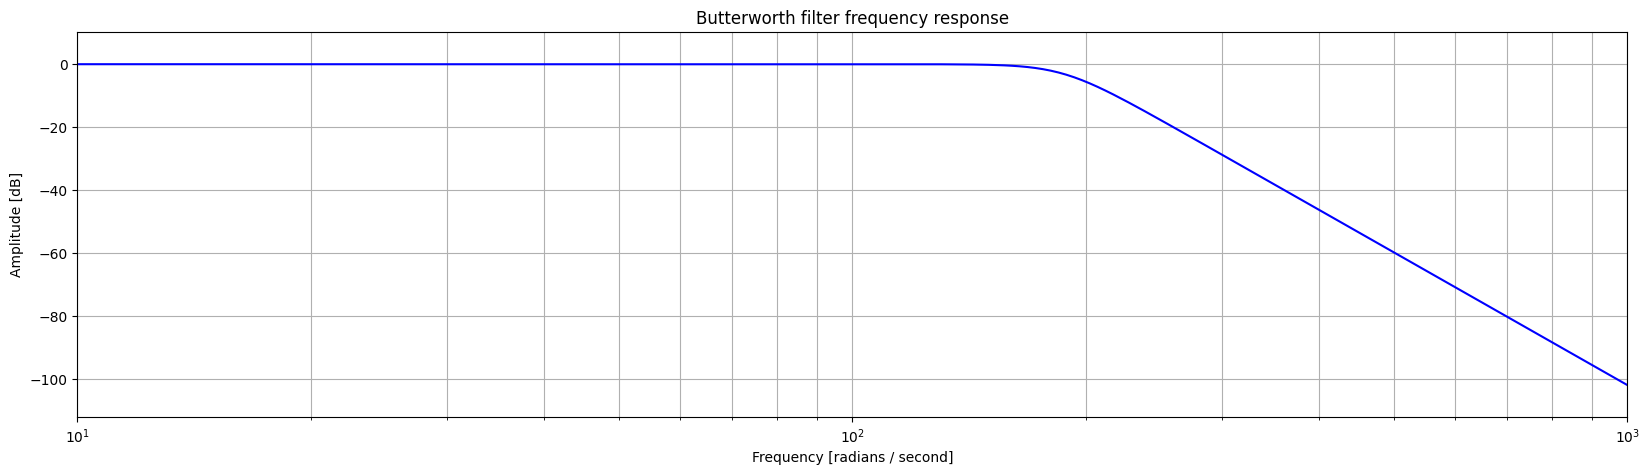

In [17]:
w, mag = freqs(b, a)
plt.figure(figsize=(20, 5))
plt.semilogx(w, 20 * np.log10(mag), 'b')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

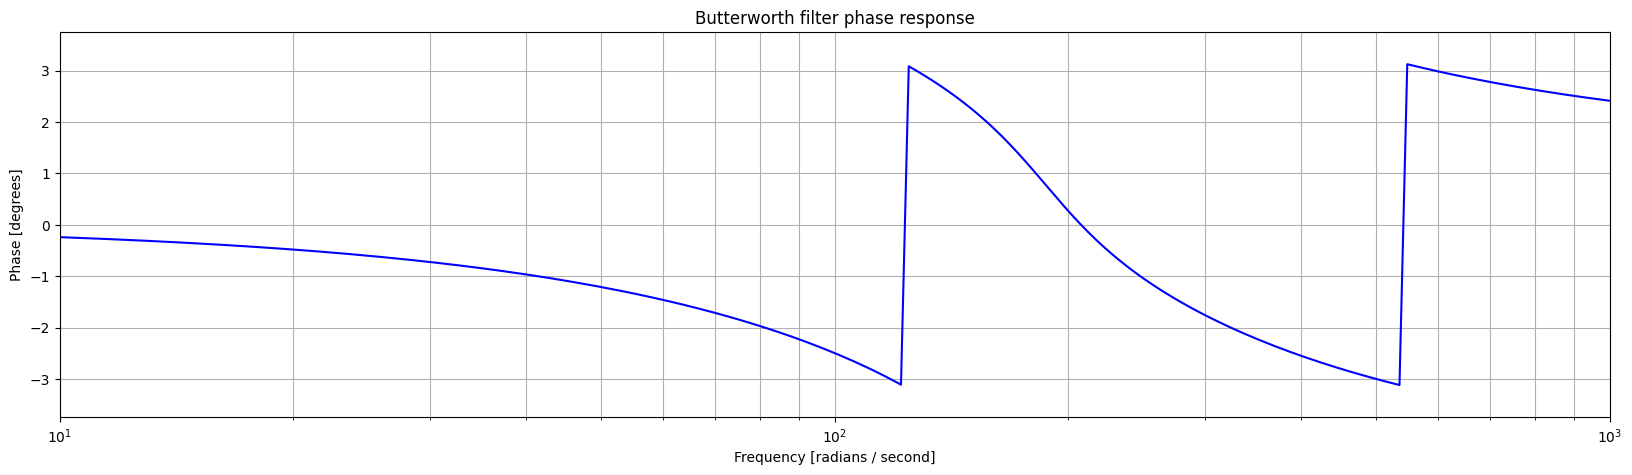

In [23]:
plt.figure(figsize=(20, 5))
plt.semilogx(w, np.angle(mag), 'b')
plt.title('Butterworth filter phase response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Phase [degrees]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

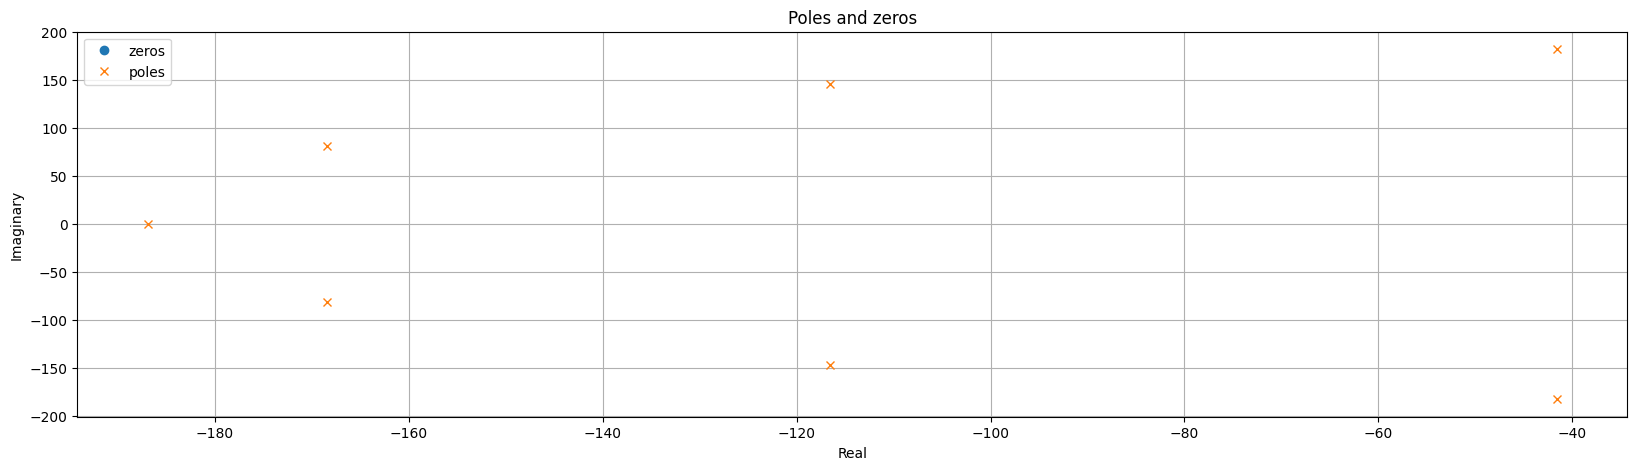

In [18]:
plt.figure(figsize=(20, 5))
plt.plot(tf.zeros.real, tf.zeros.imag, 'o', label='zeros')
plt.plot(tf.poles.real, tf.poles.imag, 'x', label='poles')
plt.title('Poles and zeros')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()
plt.grid()
plt.show()

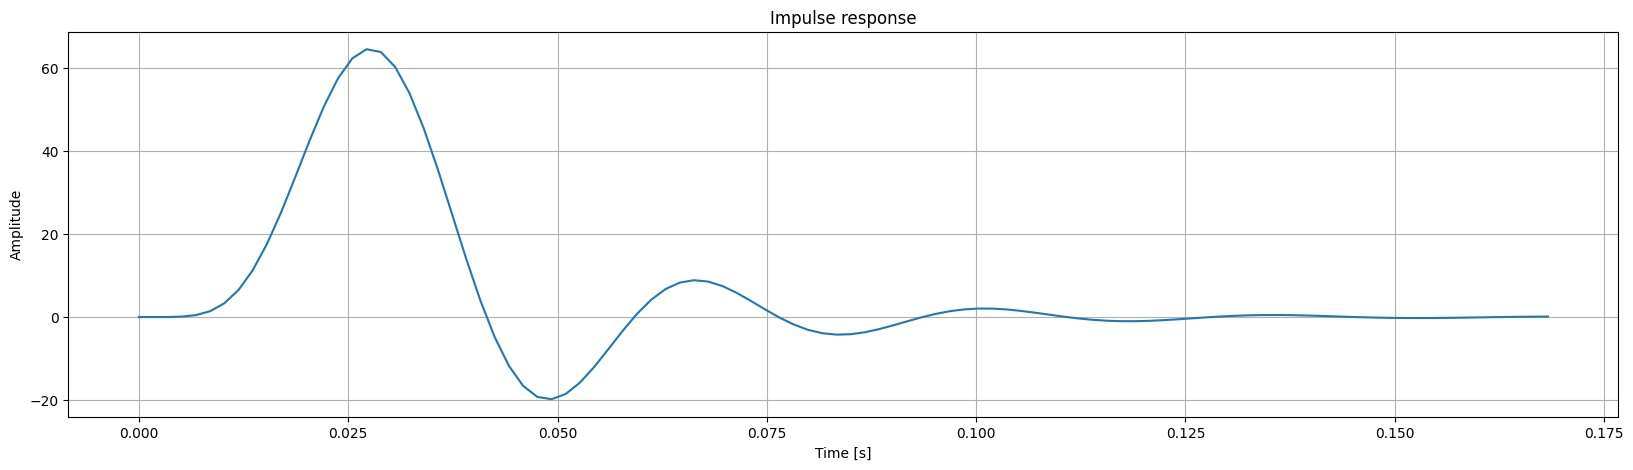

In [19]:
plt.figure(figsize=(20, 5))
t, h = impulse(tf)
plt.plot(t, h)
plt.title('Impulse response')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

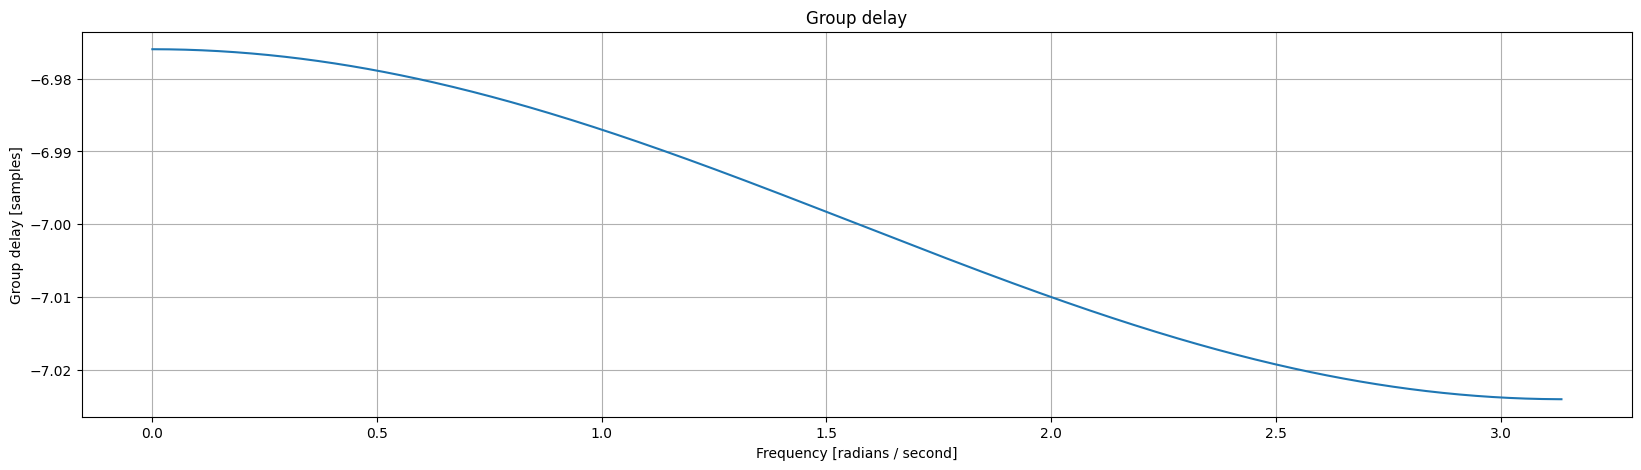

In [24]:
w, gd = group_delay((b, a))
plt.figure(figsize=(20, 5))
plt.plot(w, gd)
plt.title('Group delay')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Group delay [samples]')
plt.grid()
plt.show()

## Chebyshev I Transfer Function

In [27]:
cheby1_critical_freq = w_p

b,a = cheby1(cheby1_order, 1, cheby1_critical_freq, 'low', analog=True)

tf = TransferFunction(b, a)
print(tf)

TransferFunctionContinuous(
array([57191892.26484483]),
array([1.00000000e+00, 1.17695507e+02, 2.21844072e+04, 1.39966827e+06,
       6.41703586e+07]),
dt: None
)


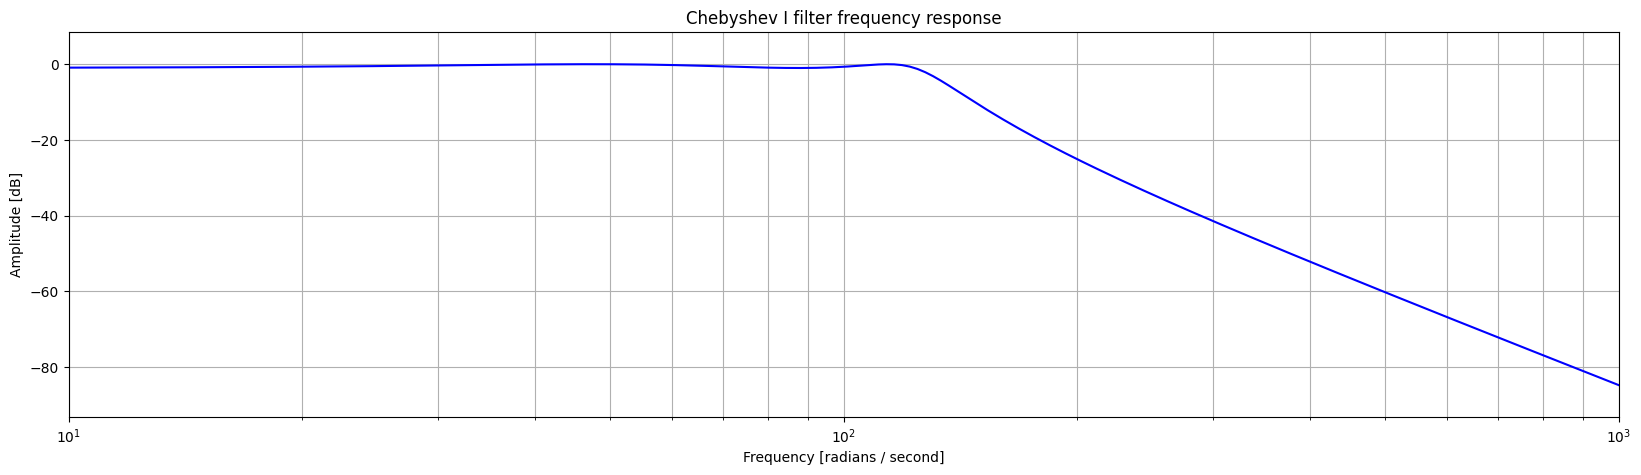

In [29]:
w, mag = freqs(b, a)
plt.figure(figsize=(20, 5))
plt.semilogx(w, 20 * np.log10(mag), 'b')
plt.title('Chebyshev I filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

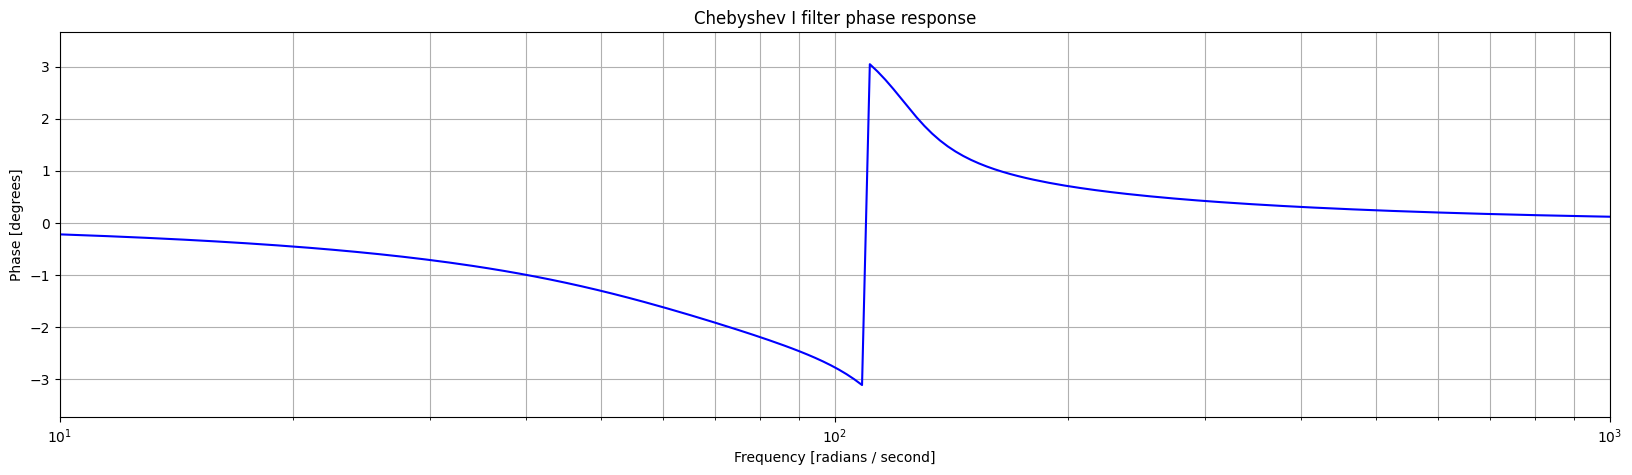

In [30]:
plt.figure(figsize=(20, 5))
plt.semilogx(w, np.angle(mag), 'b')
plt.title('Chebyshev I filter phase response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Phase [degrees]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

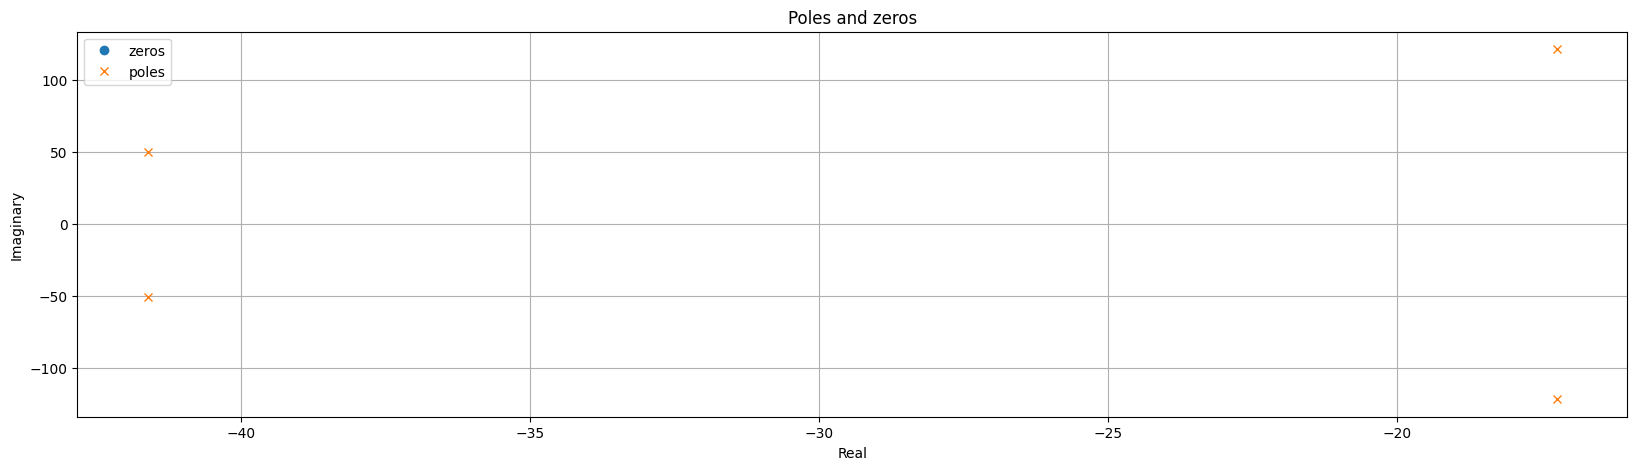

In [31]:
plt.figure(figsize=(20, 5))
plt.plot(tf.zeros.real, tf.zeros.imag, 'o', label='zeros')
plt.plot(tf.poles.real, tf.poles.imag, 'x', label='poles')
plt.title('Poles and zeros')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()
plt.grid()
plt.show()

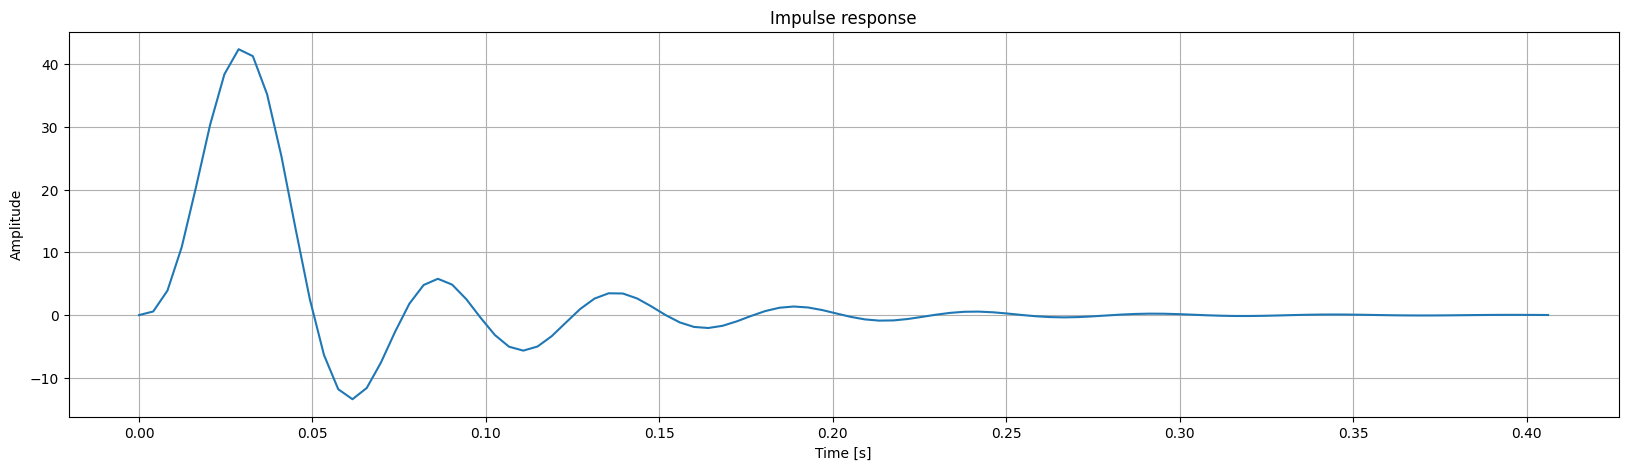

In [32]:
t, h = impulse(tf)
plt.figure(figsize=(20, 5))
plt.plot(t, h)
plt.title('Impulse response')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

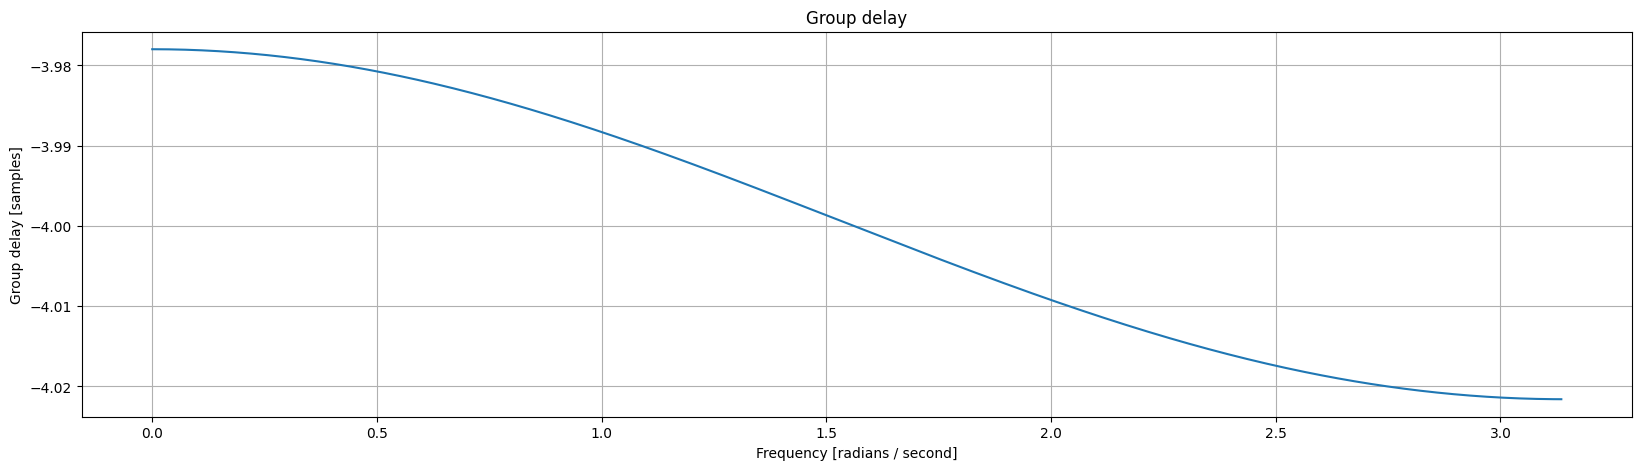

In [33]:
w, gd = group_delay((b, a))
plt.figure(figsize=(20, 5))
plt.plot(w, gd)
plt.title('Group delay')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Group delay [samples]')
plt.grid()
plt.show()